In [1]:
import sys, timeit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22, 'figure.figsize': (40, 8), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False, 'pgf.texsystem': 'pdflatex'})

%load_ext autoreload
%autoreload 2

sys.path.append('..')
import util
import Densities as de
import MultiIndex as mi
import Surrogates as su
import Transport as tm

plot_dir = open('plot.conf', 'r') .readlines()[0].rstrip()

# Multimodal Rosenbrock test target density

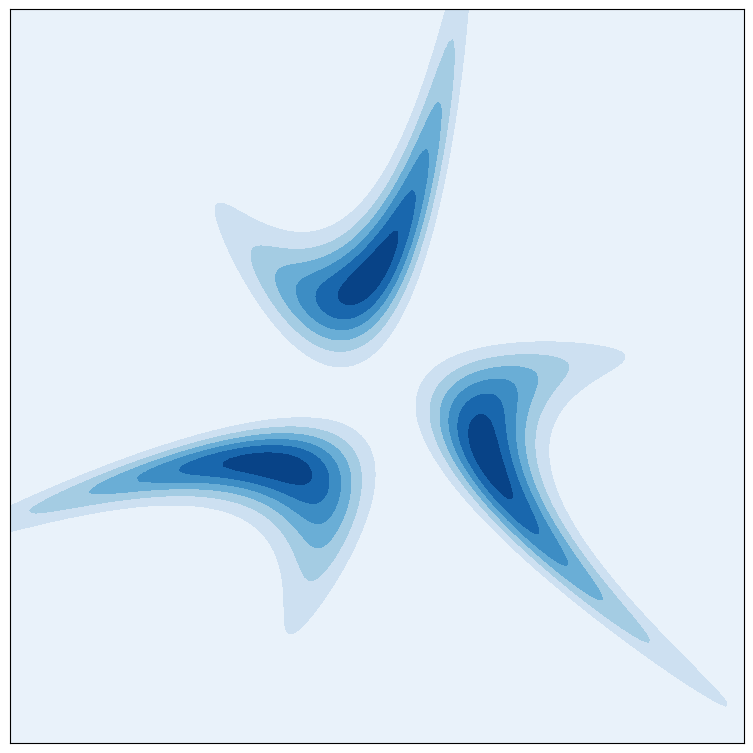

In [2]:
delta = 10*np.pi/72
thetas = [2*np.pi+.3-i*2/3*np.pi-delta for i in range(3)]
cs = [.3*np.array([np.cos(th), np.sin(th)-.2]) for th in [(6 + i*8)/12*np.pi+delta for i in range(3)]]
t_m = de.MultimodalDensity(densities=[de.Rosenbrock(a=.4, b=4, theta=t, centr=c, scale=3.5) for c, t in zip(cs,thetas)], weights=[1,1,1])

qcs, _ = util.plot.plot_density(density=t_m, figsize=8, filename=plot_dir+'rosenbrock_density.pdf')

# Surrogate density and samples distributed accordingly

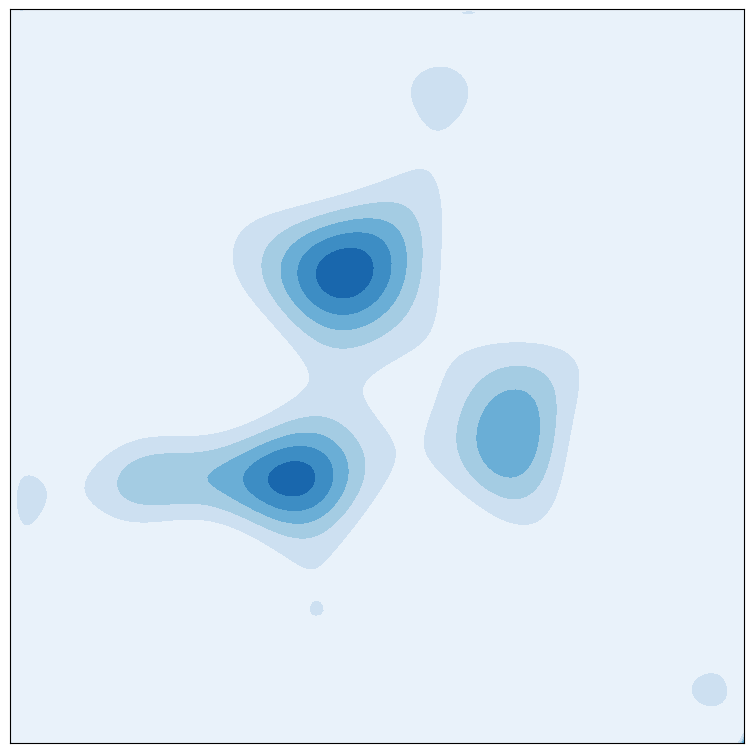

In [3]:
m_m = mi.TotalDegreeSet(dim=2, order=15)
s_m = su.Legendre(multis=m_m, target=t_m)
r_m = tm.TransportMap(s_m)

util.plot.plot_density(density=s_m, figsize=8, qcs=qcs);

In [4]:
p_uni_m, p_tar_m = r_m.samples(800)

In [5]:
lines_m, lines_t_m = r_m.grid(xs=[-1, -.98, -.8, -.6, .6, .8, .95, 1], ns=[100, 100, 50, 100, 50, 100, 100])

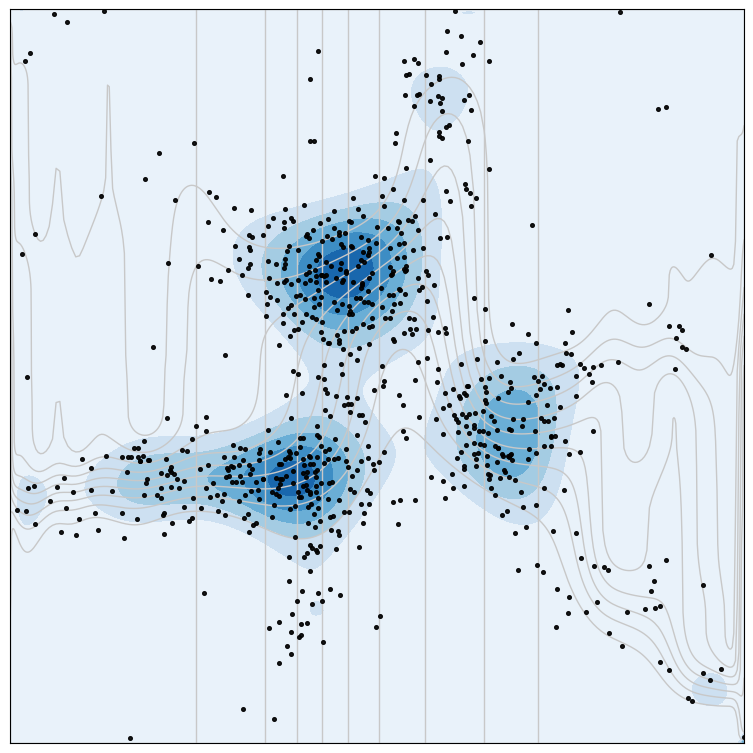

In [6]:
util.plot.plot_density(density=s_m, qcs=qcs, grid=lines_t_m, samples=p_tar_m, figsize=8, filename=plot_dir+'rosenbrock_samples.pdf');

# Convergence of $d_H$ and the WLS error

In [7]:
ks = [3,5,8,11,15,17,20,24,28,32,36,40,45,50,55,60][::-1]
dh = np.zeros((len(ks),))
ap = np.zeros((len(ks),))
xs = np.zeros((len(ks),))
ts = np.zeros((len(ks),))
for i,k in enumerate(ks) :
    m_m = mi.TotalDegreeSet(dim=2, order=k)
    s_m = su.Legendre(multis=m_m, target=t_m)
    e = s_m.computeError(n=1000, accurc=.001)
    dh[i] = e.hedist
    ap[i] = e.approx
    xs[i] = m_m.cardinality

    r_m = tm.TransportMap(s_m)
    ts[i] = timeit.timeit("r_m.samples(20)", globals=globals(), number=50) / 20 / 50
    print('.', end=' ')

. . . . . . . . . . . . . . . . 

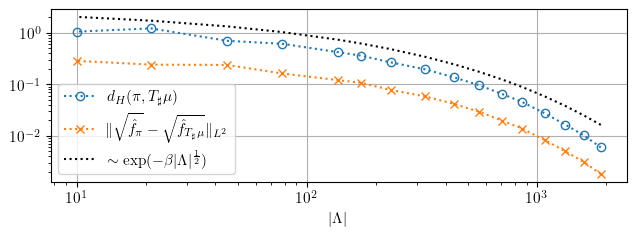

In [8]:
matplotlib.rcParams.update({"font.family": "serif", "text.usetex": True, "pgf.rcfonts": False})

tex = 0

if tex : matplotlib.use('pgf')
else :   matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 11})

ax = util.plot.get_ax(fig=plt.figure(figsize=(6.5, 2.5)), xlabel=r'$|\Lambda|$', logaxis=['x', 'y'])
ax.plot(xs, dh, marker='o', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$d_H(\pi, T_\sharp \mu)$')
ax.plot(xs, ap, marker='x', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$\|\sqrt{\hat f_\pi} - \sqrt{\hat f_{T_\sharp \mu}}\|_{L^2}$')
ax.plot(xs, 3*np.exp(-.12 * xs**.5), 'k:', label=r'$\sim \exp(-\beta|\Lambda|^{\frac{1}{2}})$')
plt.legend(), plt.tight_layout()
if tex : plt.savefig(plot_dir + 'rosenbrock_error.pgf', format='pgf')
else :   plt.show()